# Spectogram example 1
from https://sanghyu.tistory.com/37

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt 

### install librosa
https://pypi.org/project/librosa/

In [ ]:
 !pip install librosa

In [8]:
import librosa
import librosa.display

In [12]:
sample_rate = 8000
n_fft = 512

In [22]:
x = librosa.load('미 국무·국방 내일 방한…미국이 하고 싶은 말 vs 우리정부가 하고 싶은 말 KBS 20210316 .wav',16000)[0]
y = librosa.stft(x, n_fft=128, hop_length=64, win_length=128)

In [16]:
magnitude = np.abs(y)
log_spectrogram = librosa.amplitude_to_db(magnitude)

Text(0.5, 1.0, 'Spectrogram (dB)')

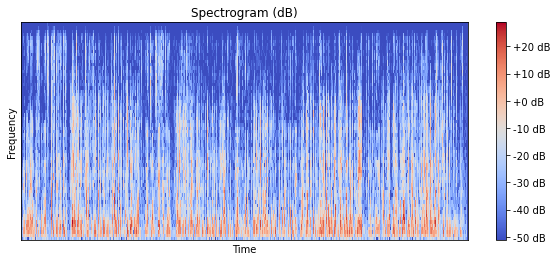

In [17]:
plt.figure(figsize=(10,4))
librosa.display.specshow(log_spectrogram, sr=16000, hop_length=64)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")

# example2 - scipy.signal.stft
from https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html

In [18]:
from scipy import signal
import matplotlib.pyplot as plt

In [19]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)

noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)

mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power),
                         size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

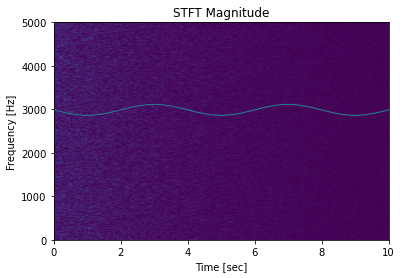

In [20]:
f, t, Zxx = signal.stft(x, fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

### 오디오 변환기 
https://audio-extractor.net/ko/